In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image
import itertools
from skimage.filters import sobel
from skimage.color import rgb2gray

In [2]:
DATA_DIR = "quiz/datafiles"

data_dir_q1 = os.path.join(DATA_DIR, "Question1")
data_dir_q2 = os.path.join(DATA_DIR, "Question2")


# Question 1

In [3]:

mean_rois = []
with open(os.path.join(data_dir_q1, "meanROI.txt")) as f:
    for line in f.readlines():
        mean_rois += [float(num) for num in line.strip().split(",")]

stim_durs = []
with open(os.path.join(data_dir_q1, "stimdur.txt")) as f:
    for line in f.readlines():
        stim_durs += [float(num) for num in line.strip().split(",")]
        
stim_times = []
with open(os.path.join(data_dir_q1, "stimtimes.txt")) as f:
    for line in f.readlines():
        stim_times += [float(num) for num in line.strip().split(",")]


In [4]:
assert len(stim_times) == len(stim_durs)


In [5]:
SAMPLE_TIME_SECONDS = 0.1

num_samples_total = 0
for i, (stim_time, stim_dur) in enumerate(zip(stim_times, stim_durs)):
    num_samples = int(stim_dur/SAMPLE_TIME_SECONDS)
    num_samples_total += num_samples


In [6]:
SAMPLE_TIME_SECONDS = 0.1

num_samples_total = 0
for i, (stim_time, stim_dur) in enumerate(zip(stim_times, stim_durs)):
    num_samples = int(stim_dur/SAMPLE_TIME_SECONDS)
    num_samples_total += num_samples
    
all_times = [round(float(x*SAMPLE_TIME_SECONDS), 1) for x in range(len(mean_rois))]
    
all_durs = np.zeros((len(all_times),))

for i, t in enumerate(all_times):
    if t in stim_times:
        j = stim_times.index(t)
        stim_dur = stim_durs[j]
        all_durs[i:i+int(stim_dur/SAMPLE_TIME_SECONDS)] = stim_dur
        

In [7]:
df = pd.DataFrame(data={"time_s": all_times, "duration_s": all_durs, "mean_roi": mean_rois})

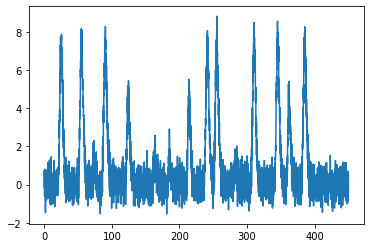

In [8]:
plt.plot(df["time_s"], df["mean_roi"])

<AxesSubplot:xlabel='duration_s', ylabel='mean_roi'>

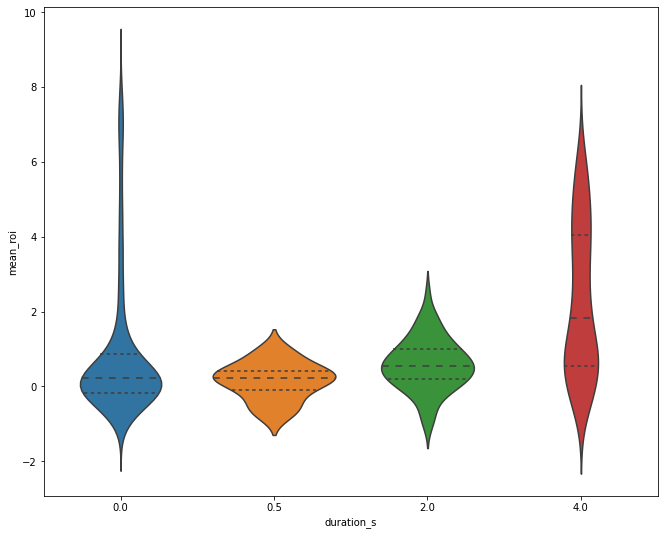

In [9]:
plt.figure(figsize=(11,9))
sns.violinplot(x="duration_s", y="mean_roi", data=df, order=sorted(list(set(df["duration_s"]))), inner="quartile")



# Question 2

In [10]:
filenames = [filename for filename in os.listdir(data_dir_q2)]
image_filepaths = [os.path.join(data_dir_q2, filename) for filename in filenames]
print(len(image_filepaths))


10


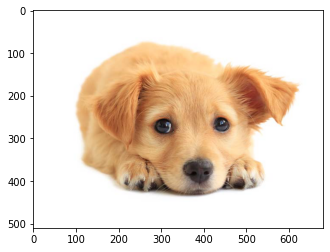

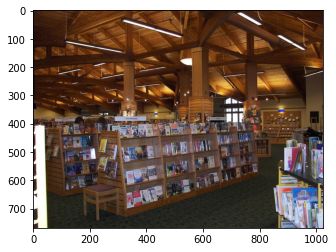

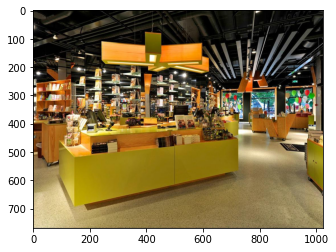

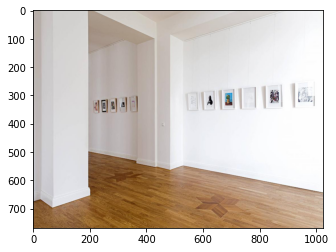

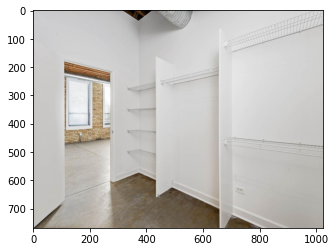

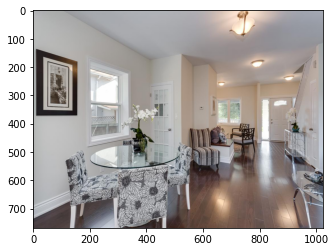

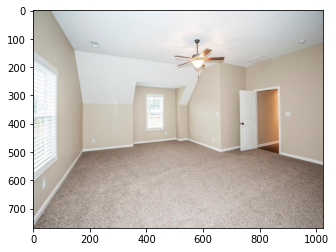

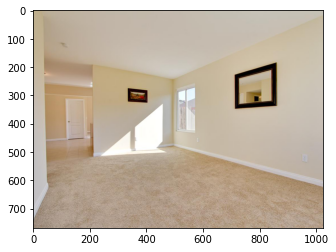

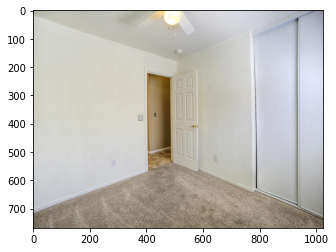

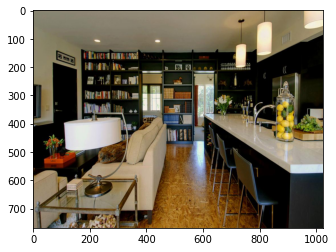

In [11]:
images = [Image.open(image_filepath) for image_filepath in image_filepaths]

for image in images:
    plt.imshow(image)
    plt.show()

In [12]:
min_size_index = None
min_w = float('inf')
for i, image in enumerate(images):
    h, w = image.size
    if w < min_w:
        min_w = w
        min_size_index = i
        
min_h, min_w = images[min_size_index].size

images_resized = [image.thumbnail((min_h, min_w)) for image in images]


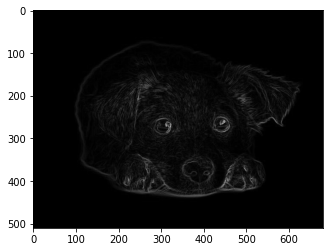

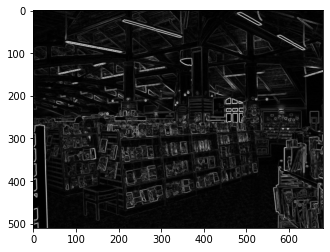

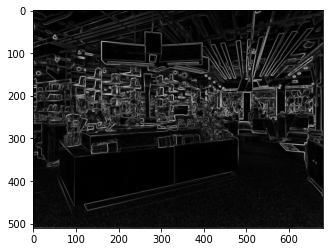

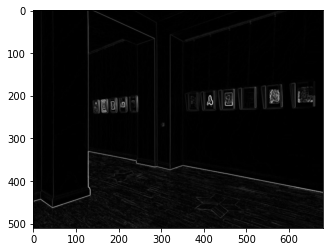

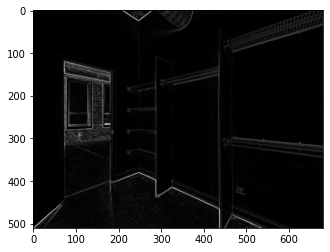

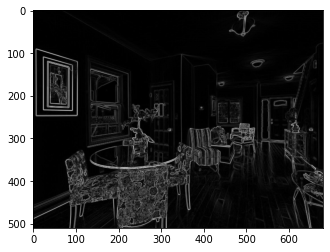

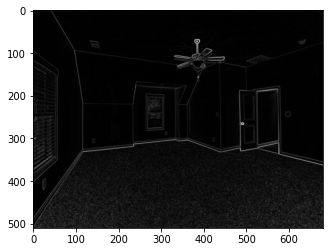

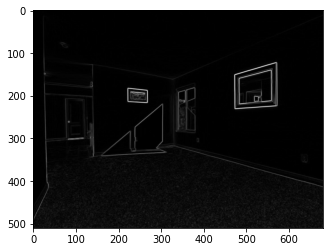

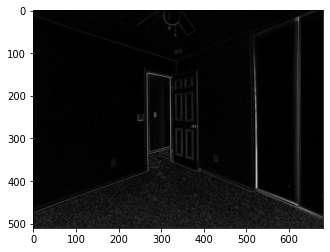

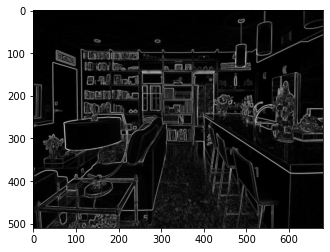

In [13]:
images_grayscale_sobel = [sobel(rgb2gray(np.asarray(image))) for image in images]

for image in images_grayscale_sobel:
    plt.imshow(image, cmap="gray")
    plt.show()

In [14]:
for image in images_grayscale_sobel:
    print(image.shape[0]/image.shape[1])

0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75


In [15]:
data = {filename : np.matrix.flatten(image) for filename, image in zip(filenames, images_grayscale_sobel)}

df = pd.DataFrame(data=data)

corr = df.corr(method='pearson')
corr    

,dog.jpg,pathways0011.jpg,pathways0010.jpg,pathways0014.jpg,pathways0028.jpg,pathways0047.jpg,pathways0024.jpg,pathways0035.jpg,pathways0036.jpg,pathways0037.jpg
dog.jpg,1.000000,0.082490,0.072067,0.091007,-0.011827,0.064367,-0.025167,0.091291,0.031827,0.110716
pathways0011.jpg,0.082490,1.000000,0.018379,-0.011755,0.000875,0.035262,-0.013258,-0.000298,-0.031666,0.008439
pathways0010.jpg,0.072067,0.018379,1.000000,0.016625,0.040606,-0.068758,-0.132803,-0.000467,-0.080566,0.078761
pathways0014.jpg,0.091007,-0.011755,0.016625,1.000000,0.011194,0.042441,0.073472,0.099456,0.099996,0.032540
pathways0028.jpg,-0.011827,0.000875,0.040606,0.011194,1.000000,0.041694,-0.027250,0.003979,0.000267,0.008086
pathways0047.jpg,0.064367,0.035262,-0.068758,0.042441,0.041694,1.000000,0.093191,0.026158,0.047032,0.020836
pathways0024.jpg,-0.025167,-0.013258,-0.132803,0.073472,-0.027250,0.093191,1.000000,0.106269,0.170599,0.007008
pathways0035.jpg,0.091291,-0.000298,-0.000467,0.099456,0.003979,0.026158,0.106269,1.000000,0.109116,0.034079
pathways0036.jpg,0.031827,-0.031666,-0.080566,0.099996,0.000267,0.047032,0.170599,0.109116,1.000000,0.031220
pathways0037.jpg,0.110716,0.008439,0.078761,0.032540,0.008086,0.020836,0.007008,0.034079,0.031220,1.000000
